In [1092]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [1093]:
df = pd.read_csv('downloads/my first dsp/train.csv')
df2 = pd.read_csv('downloads/my first dsp/test.csv')

In [1094]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1095]:
df2.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1096]:
df.columns #all columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1097]:
df.iloc[0] #first row

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [1098]:
df.iloc[[0,1]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [1099]:
df.iloc[[0,1], 3]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
Name: Name, dtype: object

In [1100]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1101]:
df.shape

(891, 12)

In [1102]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [1103]:
df.loc[[0,1,2],'Survived']

0    0
1    1
2    1
Name: Survived, dtype: int64

In [1104]:
df.loc[0:2,'Survived':'Ticket']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282


In [1105]:
df.set_index('PassengerId',inplace=True) #df.reset_index(inplace=True) (for reseting changes)
df2.set_index('PassengerId',inplace=True) #df.reset_index(inplace=True) (for reseting changes)

In [1106]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [1107]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1108]:
women = df.loc[df.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print(rate_women)

0.7420382165605095


In [1109]:
men = df.loc[df.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print(rate_men)

0.18890814558058924


In [1110]:
p1 = df.loc[df.Pclass == 1]['Survived']
rate_p1 = sum(p1)/len(p1)
print(rate_p1)

0.6296296296296297


In [1111]:
p2 = df.loc[df.Pclass == 2]['Survived']
rate_p2 = sum(p2)/len(p2)
print(rate_p2)

0.47282608695652173


In [1112]:
p3 = df.loc[df.Pclass == 3]['Survived']
rate_p3 = sum(p3)/len(p3)
print(rate_p3)

0.24236252545824846


In [1113]:
age15 = df.loc[df.Age < 15]['Survived']
rate_age15 = sum(age15)/len(age15)
print(rate_age15)

0.5769230769230769


In [1114]:
age = df.loc[df.Age >= 15]['Survived']
rate_age = sum(age)/len(age)
print(rate_age)

0.38522012578616355


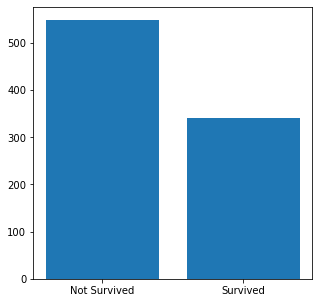

In [1115]:
div1 = df['Survived'].value_counts()
List1 = ['Not Survived', 'Survived']
plt.figure(figsize=(5,5))
plt.bar(List1,div1)
# plt.xlabel("Sex")
# plt.ylabel("Total number")
# plt.title("Passenger")
plt.show()

In [1116]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

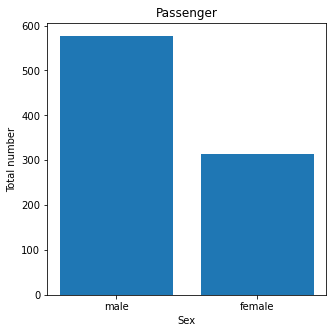

In [1117]:
div = df['Sex'].value_counts()
List = ['male', 'female']
plt.figure(figsize=(5,5))
plt.bar(List,div)
plt.xlabel("Sex")
plt.ylabel("Total number")
plt.title("Passenger")
plt.show()

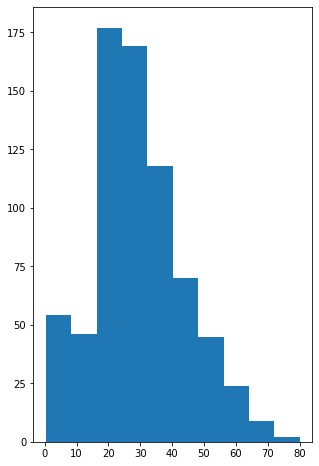

In [1118]:
plt.figure(figsize=(5,8))
plt.hist(df['Age'])
plt.show()

In [1119]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1120]:
sex_nums = {"Sex" : {"male" : 1,"female" : 0}}
emb_nums = {"Embarked" : {"C": 1,"S": 2,"Q": 3}}

In [1121]:
df = df.replace(sex_nums)
df = df.replace(emb_nums)
df2 = df2.replace(sex_nums)
df2 = df2.replace(emb_nums)

In [1122]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2.0
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2.0


In [1123]:
df2

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,3
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,2
1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1
1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2


In [1124]:
fill_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(fill_age)
df['Embarked'] = df['Embarked'].fillna(0)

In [1125]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1.0
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2.0
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2.0
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2.0


In [1126]:
df['Embarked'].value_counts()

2.0    644
1.0    168
3.0     77
0.0      2
Name: Embarked, dtype: int64

In [1127]:
fill_age2 = df2['Age'].mean()
fill_fare2 = df2['Fare'].mean()
df2['Age'] = df2['Age'].fillna(fill_age2)
df2['Embarked'] = df2['Embarked'].fillna(0)
df2['Fare'] = df2['Fare'].fillna(fill_fare2)

In [1128]:
df2

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,NaN,3
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,NaN,2
894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,NaN,3
895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,NaN,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,NaN,2
1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,1
1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2


In [1129]:
X = df
Y = df.values[:,0]

In [1130]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [1131]:
X.drop(['Fare','Survived','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [1132]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,1,22.000000,1,0,2.0
2,1,0,38.000000,1,0,1.0
3,3,0,26.000000,0,0,2.0
4,1,0,35.000000,1,0,2.0
5,3,1,35.000000,0,0,2.0
...,...,...,...,...,...,...
887,2,1,27.000000,0,0,2.0
888,1,0,19.000000,0,0,2.0
889,3,0,29.699118,1,2,2.0


In [1133]:
X = X.values[:,:]

In [1134]:
X

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ,
         2.        ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ,
         1.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ,
         2.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765,  1.        ,  2.        ,
         2.        ],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ,
         1.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ,  0.        ,
         3.        ]])

In [1135]:
X_test = df2

In [1136]:
X_test.drop(['Fare','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [1137]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,1,34.50000,0,0,3
893,3,0,47.00000,1,0,2
894,2,1,62.00000,0,0,3
895,3,1,27.00000,0,0,2
896,3,0,22.00000,1,1,2
...,...,...,...,...,...,...
1305,3,1,30.27259,0,0,2
1306,1,0,39.00000,0,0,1
1307,3,1,38.50000,0,0,2


In [1138]:
X_test = X_test.values[:,:]
Y=Y.astype('int')

In [1139]:
X_test

array([[ 3.        ,  1.        , 34.5       ,  0.        ,  0.        ,
         3.        ],
       [ 3.        ,  0.        , 47.        ,  1.        ,  0.        ,
         2.        ],
       [ 2.        ,  1.        , 62.        ,  0.        ,  0.        ,
         3.        ],
       ...,
       [ 3.        ,  1.        , 38.5       ,  0.        ,  0.        ,
         2.        ],
       [ 3.        ,  1.        , 30.27259036,  0.        ,  0.        ,
         2.        ],
       [ 3.        ,  1.        , 30.27259036,  1.        ,  1.        ,
         1.        ]])

In [1140]:
dcf_entropy = DecisionTreeClassifier(random_state = 100,max_depth = 2, min_samples_leaf = 6)
dcf_entropy.fit(X,Y)
# rfc = RandomForestClassifier(n_jobs = 2)
# rfc.fit(X,Y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=100)

In [1141]:
Y_pred = dcf_entropy.predict(X_test)
Y_pred
# Y_pred = rfc.predict(X_test)
# Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1142]:
print(Y_pred.shape)

(418,)


In [1143]:
df3 = pd.DataFrame(Y_pred)

In [1144]:
df3.loc[:,:].value_counts()

0    330
1     88
dtype: int64

In [1145]:
df4 = pd.read_csv('downloads/my first dsp/gender_submission.csv')

In [1146]:
df4['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [1147]:
df4['Survived'] = df3.loc[:,:]

In [1148]:
df4['Survived'].value_counts()

0    330
1     88
Name: Survived, dtype: int64

In [1149]:
df4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1150]:
df4.to_csv('submission.csv')